In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import csv
%matplotlib inline


In [10]:
TAGS = ['salesforce-lightning', 'lwc', 'lightning', 'salesforce-communities',
        'salesforce-chatter', 'salesforce-service-cloud', 'aura-framework', 'appian',
        'outsystems', 'google-app-maker', 'zoho', 'mendix', 'powerapps', 'powerapps-formula',
        'powerapps-selected-items', 'powerapps-collection', 'powerapps-canvas', 'quickbase', 'vinyl']

PLATFORMS = {
    'Salesforce' : ['salesforce-lightning', 'lwc', 'lightning', 'salesforce-communities',
        'salesforce-chatter', 'salesforce-service-cloud', 'aura-framework'],
    'Appian' : ['appian'],
    'Outsystems' : ['outsystems'],
    'AppMaker' : ['google-app-maker'],
    'Zoho' : ['zoho'],
    'Mendix' : ['mendix'],
    'PowerApps' : ['powerapps', 'powerapps-formula',
        'powerapps-selected-items', 'powerapps-collection', 'powerapps-canvas'],
    'QuickBase' : ['quickbase'],
    'Vinyl' : ['vinyl']
}


In [12]:
so_df = pd.read_csv('so_data.csv')
so_df.CreationDate = so_df.CreationDate.apply(pd.to_datetime)
so_df.AcceptedAnswerCreationDate = so_df.AcceptedAnswerCreationDate.apply(pd.to_datetime)
# so_df.
so_df.dtypes

Id                                     int64
PostTypeId                             int64
AcceptedAnswerId                     float64
ParentId                             float64
CreationDate                  datetime64[ns]
DeletionDate                         float64
Score                                  int64
ViewCount                              int64
Body                                  object
OwnerUserId                          float64
OwnerDisplayName                      object
LastEditorUserId                     float64
LastEditorDisplayName                 object
LastEditDate                          object
LastActivityDate                      object
Title                                 object
Tags                                  object
AnswerCount                            int64
CommentCount                           int64
FavoriteCount                        float64
ClosedDate                            object
CommunityOwnedDate                   float64
ContentLic

In [13]:
print(so_df.sort_values(by='CreationDate').iloc[0].CreationDate)
so_df.sort_values(by='CreationDate').head(5)

2008-11-28 18:18:37.777000


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense,AcceptedAnswer,AcceptedAnswerCreationDate
0,326366,1,598997.0,NaN,2008-11-28 18:18:37.777,NaN,0,2106,<p>I wish to create an online system to track ...,34935.0,...,Experiences with Zoho Creator?,<database><zoho>,5,0,NaN,2013-05-24T23:57:00.807,NaN,CC BY-SA 3.0,<p>I also tried building a simple web applicat...,2009-03-01 00:39:41.493
1,359717,1,359725.0,NaN,2008-12-11 15:30:30.840,NaN,1,329,<p>I usually use IIS in conjunction with the O...,42010.0,...,What's the best free resource to learn about M...,<iis><outsystems>,2,0,1.0,NaN,NaN,CC BY-SA 2.5,"<p><a href=""http://learn.iis.net/"" rel=""nofoll...",2008-12-11 15:32:59.553
2,544097,1,3325135.0,NaN,2009-02-12 23:48:51.290,NaN,4,3207,<p>I need to create good looking lightning usi...,50365.0,...,Create lightning in OpenGL ES 1.1,<iphone><animation><opengl-es><lightning>,5,1,1.0,NaN,NaN,CC BY-SA 3.0,<p>The usual approach is to compute the path o...,2010-07-24 12:49:15.587
3,980932,1,981468.0,NaN,2009-06-11 13:02:07.977,NaN,2,1263,"<p>Hey, I'm having some trouble using the Qui...",119400.0,...,Python QuickBase API Help,<python><xml><api><post><quickbase>,1,1,1.0,NaN,NaN,CC BY-SA 3.0,<p>Got it. For some reason The data I was sen...,2009-06-11 14:33:47.367
4,1236439,1,1237753.0,NaN,2009-08-06 00:38:58.153,NaN,1,2655,<p>I am using the OutSystems platform and I am...,151452.0,...,How do generate screen elements dynamically in...,<dynamic><user-interface><outsystems>,1,0,1.0,NaN,NaN,CC BY-SA 2.5,<p>You may have a List Records widget with sev...,2009-08-06 09:01:43.890


# Stats per tag

In [4]:
sum = 0
no_of_questions = []
avg_view_count = []
avg_fav_count = []
for tag in TAGS:
    indicesToRemove = []
    for i in range(len(so_df)):
        qtags = so_df.iloc[i]['Tags'][1:-1].replace('><', ' ').split()
        f = True
        for qtag in qtags:
            if qtag == tag:
                f = False
                break
        if f:
            indicesToRemove.append(i)
    temp_df = so_df.drop(index=indicesToRemove)
    no_of_questions.append(len(temp_df))
    avg_view_count.append(temp_df.ViewCount.mean())
    avg_fav_count.append(temp_df.FavoriteCount.mean())
    sum += len(temp_df)
print(sum)
df = pd.DataFrame()
df['Tag_Name'] = TAGS
df['Num_of_Questions'] = no_of_questions
df['Avg_View_Count'] = avg_view_count
df['Avg_Fav_Count'] = avg_fav_count
df.to_csv('StatsPerTag.csv', index= False)
df

4043


,Tag_Name,Num_of_Questions,Avg_View_Count,Avg_Fav_Count
0,salesforce-lightning,561,510.065954,0.957447
1,lwc,70,254.728571,0.500000
2,lightning,139,765.899281,1.052632
3,salesforce-communities,141,424.170213,0.933333
4,salesforce-chatter,105,1026.704762,1.333333
5,salesforce-service-cloud,219,775.410959,1.043478
6,aura-framework,35,707.257143,0.750000
7,appian,16,366.562500,2.000000
8,outsystems,147,1156.931973,1.312500
9,google-app-maker,1123,272.363313,1.072539


# Stats per platform

In [7]:
sum = 0
no_of_questions = []
no_of_accepted_answers = []
avg_view_count = []
avg_fav_count = []
avg_score = []
for platform in PLATFORMS:
    indicesToRemove = []
    for i in range(len(so_df)):
        qtags = so_df.iloc[i]['Tags'][1:-1].replace('><', ' ').split()
        f = True
        for qtag in qtags:
            for ptag in PLATFORMS[platform]:
                if qtag == ptag:
                    f = False
                    break
        if f:
            indicesToRemove.append(i)
    temp_df = so_df.drop(index=indicesToRemove)
    no_of_questions.append(len(temp_df))
    no_of_accepted_answers.append(temp_df.AcceptedAnswer.count())
    avg_view_count.append(temp_df.ViewCount.mean())
    avg_fav_count.append(temp_df.FavoriteCount.mean())
    avg_score.append(temp_df.Score.mean())
    sum += len(temp_df)
print(sum)
df = pd.DataFrame()
df['Platform'] = PLATFORMS.keys()
df['Num_of_Questions'] = no_of_questions
df['Num_of_Accepted_Answers'] = no_of_accepted_answers
df['Avg_View_Count'] = avg_view_count
df['Avg_Fav_Count'] = avg_fav_count
df['Avg_Score'] = avg_score
df.to_csv('StatsPerPlatform.csv', index= False)
df

3597


,Platform,Num_of_Questions,Num_of_Accepted_Answers,Avg_View_Count,Avg_Fav_Count,Avg_Score
0,Salesforce,1031,220,619.747818,1.055556,0.401552
1,Appian,16,5,366.562500,2.000000,0.375000
2,Outsystems,147,79,1156.931973,1.312500,1.040816
3,AppMaker,1123,452,272.363313,1.072539,0.476402
4,Zoho,445,149,874.955056,1.263158,0.768539
5,Mendix,35,13,459.742857,1.000000,0.714286
6,PowerApps,710,221,684.540845,1.000000,0.554930
7,QuickBase,67,33,575.014925,0.900000,0.447761
8,Vinyl,23,16,289.391304,1.000000,2.608696


# Platform related figures

In [70]:
SAMPLING = '3MS'
DUMMY_DATE = pd.to_datetime('2008-11-27 18:18:37.777')

final_df = so_df.resample(SAMPLING, on="CreationDate").count()[['Id']]
final_df.columns = ['Total']
for platform in PLATFORMS:
    indicesToRemove = []
    for i in range(len(so_df)):
        # if so_df.iloc[i]['CreationDate'] == DUMMY_DATE:
        #     continue
        qtags = so_df.iloc[i]['Tags'][1:-1].replace('><', ' ').split()
        f = True
        for qtag in qtags:
            for ptag in PLATFORMS[platform]:
                if qtag == ptag:
                    f = False
                    break
        if f:
            indicesToRemove.append(i)
    temp_df = so_df.drop(index=indicesToRemove)
    # dummy date for resampling start
    temp_df = temp_df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
    temp_df = temp_df.resample(SAMPLING, on = "CreationDate").count()[['Id']]
    temp_df.columns = [platform]
    final_df = final_df.merge(temp_df, how='left', on='CreationDate', validate='one_to_one')

final_df.fillna(0, inplace=True)
final_df = final_df.astype('int64')
# final_df.to_csv('trend.csv')

# integrity check
for i in range(len(final_df)):
    sum = 0
    for platform in PLATFORMS:
        sum += final_df.iloc[i][platform]
    if(final_df.iloc[i].Total != sum):
        print('Failed')

print(len(final_df))
final_df
final_df = final_df[-30:]

47


<ipython-input-75-6904bbd6bfc5>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


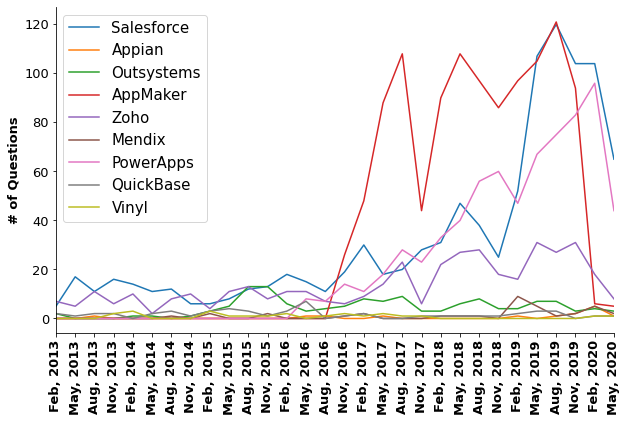

In [75]:
font_size = 13
ax = final_df.drop(columns='Total').plot(figsize=(10,6), fontsize=font_size)
# plt.xlabel('Year')
ax1 = plt.axes()
ax1.xaxis.label.set_visible(False)

plt.ylabel('# of Questions', weight='bold', size=font_size)
labels = [x.strftime("%b, %Y") for x in final_df.index]

ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=90, weight = 'bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(fontsize=font_size + 2)

# plt.grid()
# plt.savefig('question_per_platform.png', dpi=1000, bbox_inches = "tight")
plt.savefig('question_per_platform_3M.pdf', dpi=1000, bbox_inches = "tight")
plt.show()

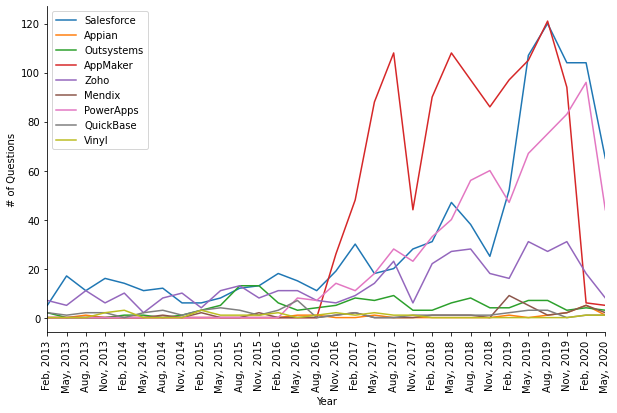

In [46]:
# ax = final_df.drop(columns='Total').plot(figsize=(10,6))
# plt.xlabel('Year')
# plt.ylabel('# of Questions')
# labels = [x.strftime("%b, %Y") for x in final_df.index]
# ax.set_xticks(labels)
# ax.set_xticklabels(labels, rotation=90)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # plt.grid()
# # plt.savefig('question_per_platform.png', dpi=1000, bbox_inches = "tight")
# plt.savefig('question_per_platform_3M.pdf', dpi=1000, bbox_inches = "tight")
# plt.show()

In [ ]:
final_df.plot(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('# of Questions')
plt.grid()
plt.savefig('platform_Per_Three_Month_With_Total.png', dpi=1000, bbox_inches = "tight")
plt.show()

# Topic modeling related figures

In [14]:
TOPIC_ID_LOW_CATEGORY = {
    0 : 'Data Storage & Migration',
    1 : 'Dynamic Form Controller',
    2 : 'Access Control & Security',
    3 : 'SQL CRUD',
    4 :	'Entity Relationship Management',
    5 : 'UI Adaptation',
    6 :	'External Web Req Processing',
    7 :	'External API & Email Config',
    8 :	'Dynamic Content Binding',
    9 : 'Cloud and On-Prem Conf',
    10 : 'Dynamic Content Display',
    11 : 'Client Server Comm & IO',
    12 : 'Dynamic Event Handling'
}

TOPIC_ID_SUB_CATEGORY = {
    0 : 'Migration',
    1 : 'UI',
    2 : 'Configuration',
    3 : 'Management',
    4 :	'Management',
    5 : 'UI',
    6 :	'',
    7 :	'',
    8 :	'Middleware',
    9 : 'Configuration',
    10 : 'Middleware',
    11 : '',
    12 : 'Middleware'
}

TOPIC_ID_HIGHER_CATEGORY = {
    0 : 'Database',
    1 : 'Customization',
    2 : 'Adoption',
    3 : 'Database',
    4 :	'Database',
    5 : 'Customization',
    6 :	'Integration',
    7 :	'Integration',
    8 :	'Customization',
    9 : 'Adoption',
    10 : 'Customization',
    11 : 'Adoption',
    12 : 'Customization'
}

HIGHER_CAT_TO_TOPIC_ID = {
    'Database' : [0, 3, 4],
    'Customization' : [1, 5, 8, 10, 12],
    'Adoption' : [2, 9, 11],
    'Integration' : [6, 7]
}

In [6]:
def linkToId(x):
    '''
    Takes a excel styled link and retures the QuestionID
    '''
    return int(x.split('"')[::-1][1])


def make_link(id, type):
    '''
    returns stackoverflow url string of question/answer in hyperlink format for CSV/EXCEL
    id = postid
    type : 'q' for question
           'a' for answer
    '''
    url = f'https://stackoverflow.com/{type}/{id}'
    return f'=HYPERLINK("{url}", "{id}")'

In [77]:
SAMPLING = '3MS'
DUMMY_DATE = pd.to_datetime('2008-11-27 18:18:37.777')

final_df = so_df.resample(SAMPLING, on='CreationDate').count()[['Id']]
final_df.columns = ['Total']
print(final_df.head())
for category in HIGHER_CAT_TO_TOPIC_ID:
    idsToRetain = []
    for topic_id in HIGHER_CAT_TO_TOPIC_ID[category]:
        temp_df = pd.read_csv(f'./TopicToPost/{topic_id}/Questions.csv')
        idsToRetain.extend(temp_df.link.apply(linkToId).tolist())
    temp_df = so_df[so_df['Id'].isin(idsToRetain)]
    total_question = len(temp_df)
    # dummy date for resampling start
#     print(temp_df.head())
    temp_df = temp_df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
#     print(temp_df.head())
    temp_df = temp_df.resample(SAMPLING, on = 'CreationDate').count()[['Id']]
    temp_df.columns = [category]
    final_df = final_df.merge(temp_df, how='left', on='CreationDate', validate='one_to_one')
    print("Category: " + category + " total question: " + str(total_question))

final_df.fillna(0, inplace=True)
final_df = final_df.astype('int64')
# final_df.to_csv(f'TopicModelingTrend_HighLevel_Sampling({SAMPLING}).csv')

# integrity check
for i in range(len(final_df)):
    sum = 0
    for category in HIGHER_CAT_TO_TOPIC_ID:
        sum += final_df.iloc[i][category]
    if(final_df.iloc[i].Total != sum):
        print('Failed')
        
print(len(final_df))
final_df
final_df = final_df[-30:]
print(len(final_df))
print(final_df.head())

              Total
CreationDate       
2008-11-01        2
2009-02-01        1
2009-05-01        1
2009-08-01        2
2009-11-01        1
Category: Database total question: 774
Category: Customization total question: 1429
Category: Adoption total question: 791
Category: Integration total question: 603
47
30
              Total  Database  Customization  Adoption  Integration
CreationDate                                                       
2013-02-01       16         4              3         2            7
2013-05-01       23         4              7         5            7
2013-08-01       25         4              5         3           13
2013-11-01       26         4              9         4            9
2014-02-01       28         5              7         8            8


<ipython-input-78-ce5c16c7e02a>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


DatetimeIndex(['2013-02-01', '2013-05-01', '2013-08-01', '2013-11-01',
               '2014-02-01', '2014-05-01', '2014-08-01', '2014-11-01',
               '2015-02-01', '2015-05-01', '2015-08-01', '2015-11-01',
               '2016-02-01', '2016-05-01', '2016-08-01', '2016-11-01',
               '2017-02-01', '2017-05-01', '2017-08-01', '2017-11-01',
               '2018-02-01', '2018-05-01', '2018-08-01', '2018-11-01',
               '2019-02-01', '2019-05-01', '2019-08-01', '2019-11-01',
               '2020-02-01', '2020-05-01'],
              dtype='datetime64[ns]', name='CreationDate', freq=None)
<class 'module'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


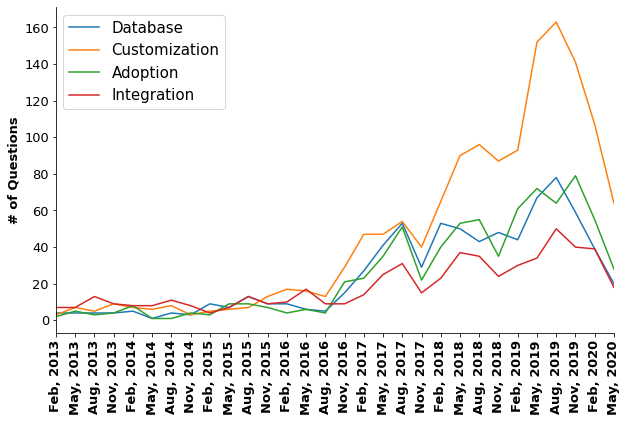

In [78]:
font_size = 13
ax = final_df.drop(columns='Total').plot(figsize=(10,6), fontsize=font_size)
# plt.xlabel('Year')
ax1 = plt.axes()
ax1.xaxis.label.set_visible(False)

plt.ylabel('# of Questions', weight='bold', size=font_size)
print(final_df.index)
print(type(plt))
print(type(final_df.index[0]))


# ax.set_xticklabels(['xyz 2009','xyz 2011','xyz 2013','xyz 2015','xyz 2017','xyz 2019', 'Jan 2021'], rotation=0)
labels = [x.strftime("%b, %Y") for x in final_df.index]
ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=90, weight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(fontsize='x-large')
ax.legend(fontsize=font_size + 2)

# plt.grid()
# plt.savefig('Question_per_higher_category_2.png', dpi=1000, bbox_inches = "tight")
plt.savefig('Question_per_higher_category_3M.pdf', dpi=1000, bbox_inches = "tight")
# plt.savefig('Question_per_higher_category.eps', format='eps', dpi=1000, bbox_inches = "tight")

plt.show()



[ 0  1  2  3  4  5  6  7  8  9 10 11]


ConversionError: Failed to convert value(s) to axis units: ['Nov, 2008', 'Mar, 2009', 'Jul, 2009', 'Nov, 2009', 'Mar, 2010', 'Jul, 2010', 'Nov, 2010', 'Mar, 2011', 'Jul, 2011', 'Nov, 2011', 'Mar, 2012', 'Jul, 2012']

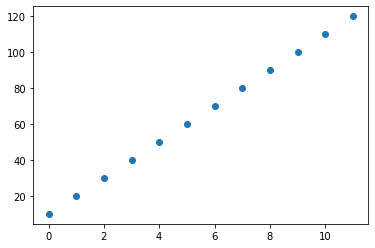

In [49]:
# x = ['Nov, 2008', 'Mar, 2009', 'Jul, 2009', 'Nov, 2009', 'Mar, 2010', 'Jul, 2010', 'Nov, 2010', 'Mar, 2011', 'Jul, 2011', 'Nov, 2011', 'Mar, 2012', 'Jul, 2012']
# y = [10,20,30,40,50,60,70,80,90,100,110,120]
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.plot(np.arange(len(x)), y, 'o')
# a = np.arange(len(x))
# print(a)
# ax1.set_xticks(x)
# plt.show()

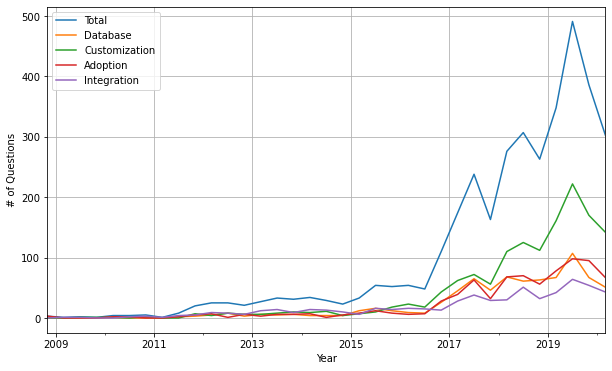

In [47]:
final_df.plot(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('# of Questions')
plt.grid()
plt.savefig('Topic_Modeling_Higher_Cat_Per_Six_Month_With_Total.png', dpi=1000)
plt.show()

# Topic modelling and SDLC
output (toicID, TopicName, #Requriment, #Design, .. #deployment)


In [315]:
FILE_INPUT = 'inputs/CU_v3.csv'
SDLCPhases = ['Requirement', 'Planning and Design',  'Development', 'Deployment', 'Maintenance',  'Testing']
SDLCMap = {}
for phase in SDLCPhases:
    SDLCMap[phase] = []
all_df = pd.read_csv(FILE_INPUT)
count = 0
totals = []
for topic in TOPIC_ID_LOW_CATEGORY:
    df = all_df[all_df['Topic_Id'] == topic]
    total = len(df)
    print(len(df))
    count += len(df)
    for phase in SDLCPhases:
        c = len(df[df['SDLC'] == phase])
#         print(phase + " " + str(c))
        SDLCMap[phase].append(c)
    totals.append(total)
#     break
df = pd.DataFrame()
df['topicId'] = TOPIC_ID_LOW_CATEGORY.keys()
df['topicName'] = TOPIC_ID_LOW_CATEGORY.values()
df['Totals'] = totals
for phase in SDLCPhases:
    df[phase] = SDLCMap[phase]
    
df.to_csv('SDLC_stat_per_topicID.csv', index= False)
print(df)

# print(count)
    

68
69
77
79
67
64
102
43
56
55
81
57
81
    topicId                       topicName  Totals  Requirement  \
0         0        Data Storage & Migration      68            0   
1         1         Dynamic Form Controller      69            0   
2         2       Access Control & Security      77            4   
3         3                        SQL CRUD      79            1   
4         4  Entity Relationship Management      67            1   
5         5                   UI Adaptation      64            0   
6         6     External Web Req Processing     102            0   
7         7     External API & Email Config      43            0   
8         8         Dynamic Content Binding      56            0   
9         9          Cloud and On-Prem Conf      55            8   
10       10         Dynamic Content Display      81            0   
11       11         Client Server Comm & IO      57            0   
12       12          Dynamic Event Handling      81            0   

    Pla

# Generate latex code for table from excel data

In [317]:
SDLCPhases = ['Requirement', 'Planning and Design',  'Development',  'Testing', 'Deployment', 'Maintenance', ]
all_df = pd.read_csv("SDLC_stat_per_topicID.csv")
for i in range(len(all_df)):
#     print(all_df.iloc[i]['Requirement'])
    value = "\sixbars"
    for phase in SDLCPhases:
        value += '{' + str(all_df.iloc[i][phase]) + '}'
    print("TopicID: " + str(all_df.iloc[i]['topicId']) + " name: " + all_df.iloc[i]['topicName'] + " : " + value)

TopicID: 0 name: Data Storage & Migration : \sixbars{0}{3}{63}{0}{2}{0}
TopicID: 1 name: Dynamic Form Controller : \sixbars{0}{2}{67}{0}{0}{0}
TopicID: 2 name: Access Control & Security : \sixbars{4}{3}{42}{14}{12}{2}
TopicID: 3 name: SQL CRUD : \sixbars{1}{4}{74}{0}{0}{0}
TopicID: 4 name: Entity Relationship Management : \sixbars{1}{5}{58}{0}{3}{0}
TopicID: 5 name: UI Adaptation : \sixbars{0}{1}{59}{1}{2}{1}
TopicID: 6 name: External Web Req Processing : \sixbars{0}{3}{99}{0}{0}{0}
TopicID: 7 name: External API & Email Config : \sixbars{0}{0}{41}{1}{1}{0}
TopicID: 8 name: Dynamic Content Binding : \sixbars{0}{5}{49}{0}{2}{0}
TopicID: 9 name: Cloud and On-Prem Conf : \sixbars{8}{12}{28}{4}{2}{1}
TopicID: 10 name: Dynamic Content Display : \sixbars{0}{2}{78}{0}{0}{1}
TopicID: 11 name: Client Server Comm & IO : \sixbars{0}{0}{54}{1}{0}{2}
TopicID: 12 name: Dynamic Event Handling : \sixbars{0}{0}{73}{1}{0}{7}


In [307]:
all_df = pd.read_csv("SDLC_stat_per_topicID.csv")

all_df = all_df['topicId']

print(all_df)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
Name: topicId, dtype: int64


# STAT ON Challenges

In [126]:
CHALLENGES = ['Feature', 'Authentication & Authorization',  'Documentation', 'Testing/Debugging', 'Deployment']

In [154]:
CHALLENGES = ['Authentication & Authorization', 'Feature',  'Documentation', 'Testing/Debugging', 'Deployment']
# CHALLENGES = [ 'Feature']


FILE_NAME = 'challenges.csv'
SAMPLING = 'MS'
DUMMY_DATE = pd.to_datetime('2008-11-27 18:18:37.777')
df = pd.read_csv(FILE_NAME)
df.CreationDate = df.CreationDate.apply(pd.to_datetime)
final_df = df.resample(SAMPLING, on='CreationDate').count()[['Question_id']]
# final_df = df.resample(SAMPLING, on='CreationDate').count()
final_df.columns = ['Total']
print(final_df.head())
for challenge in CHALLENGES:
    print(challenge)
    idsToRetain = []
#     ids = df[df.ChallengeLabelModGias == challenge][['Question_id']]
#     print(ids)
#     for topic_id in HIGHER_CAT_TO_TOPIC_ID[category]:
#         temp_df = pd.read_csv(f'./TopicToPost/{topic_id}/Questions.csv')
#         idsToRetain.extend(temp_df.link.apply(linkToId).tolist())
#     temp_df = so_df[so_df['Id'].isin(idsToRetain)]
    if(challenge == "Authentication & Authorization"):
        temp_df = df[(df.ChallengeLabelModGias == "Authentication") | (df.ChallengeLabelModGias == 'Authorization')]
    else:
        temp_df = df[df.ChallengeLabelModGias == challenge]
    # dummy date for resampling start
    temp_df = temp_df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
    temp_df = temp_df.resample(SAMPLING, on = 'CreationDate').count()[['Question_id']]
    temp_df.columns = [challenge]
    final_df = final_df.merge(temp_df, how='left', on='CreationDate', validate='one_to_one')
#     print(final_df)

final_df.fillna(0, inplace=True)
final_df = final_df.astype('int64')
# final_df.to_csv(f'TopicModelingTrend_HighLevel_Sampling({SAMPLING}).csv')

# # integrity check
# for i in range(len(final_df)):
#     sum = 0
#     for category in HIGHER_CAT_TO_TOPIC_ID:
#         sum += final_df.iloc[i][category]
#     if(final_df.iloc[i].Total != sum):
#         print('Failed')
        
print(len(final_df))
# final_df.to_csv("Manual_labelling.csv")
final_df = final_df[-25:]
# print(final_df)

              Total
CreationDate       
2008-11-01        1
2008-12-01        2
2009-01-01        0
2009-02-01        0
2009-03-01        0
Authentication & Authorization
Feature
Documentation
Testing/Debugging
Deployment
139


# Generate challengewise popularity and difficulty data

In [190]:
so_df = pd.read_csv('so_data.csv')
so_df.CreationDate = so_df.CreationDate.apply(pd.to_datetime)
so_df.AcceptedAnswerCreationDate = so_df.AcceptedAnswerCreationDate.apply(pd.to_datetime)
# so_df.AcceptedAnswerId = so_df.AcceptedAnswerId.apply('str')
so_df.dtypes
# print(so_df['AcceptedAnswerId'])
pd.isna(so_df['AcceptedAnswerId']).sum()
print(len(so_df) - 2409)

1188


In [217]:
CHALLENGES = ['Authentication & Authorization', 'Feature',  'Documentation', 'Testing/Debugging', 'Deployment']
# CHALLENGES = [ 'Deployment']


FILE_NAME = 'challenges.csv'
df = pd.read_csv(FILE_NAME)
final_df = pd.DataFrame(columns=['Challenge', '#Questions', 'ques_with_out_acc', 'avgview', 'percentage_of_ques_with_out_acc'])
# data = {}

for challenge in CHALLENGES:
    print(challenge)
    idsToRetain = []
    if(challenge == "Authentication & Authorization"):
        idsToRetain = df[(df.ChallengeLabelModGias == "Authentication") | (df.ChallengeLabelModGias == 'Authorization')]
    else:
        idsToRetain = df[df.ChallengeLabelModGias == challenge]
    idsToRetain = idsToRetain['Question_id']
    temp_df = so_df[so_df['Id'].isin(idsToRetain)]
    print(len(temp_df))
    avg_view = round(temp_df['ViewCount'].sum() / len(temp_df), 0)
#     print(temp_df['AcceptedAnswerId'])
    ques_with_out_acc = pd.isna(temp_df['AcceptedAnswerId']).sum()
    percentage_of_ques_with_out_acc = round(ques_with_out_acc * 100.0 / (len(temp_df)), 2)
    
    
    print(avg_view)
    print(percentage_of_ques_with_out_acc)
    data = {
    'Challenge': (challenge),
    '#Questions': (len(temp_df)),
    'ques_with_out_acc': (ques_with_out_acc),
    'avgview': (avg_view),
    'percentage_of_ques_with_out_acc': (percentage_of_ques_with_out_acc)}
#     row = []
#     row.append(challenge)
#     row.append(len(temp_df))
#     row.append(ques_with_out_acc)
#     row.append(avg_view)
#     row.append(percentage_of_ques_with_out_acc)
#     print(data)
    final_df = final_df.append(data, ignore_index = True)
    
    
#     # dummy date for resampling start
#     temp_df = temp_df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
#     temp_df = temp_df.resample(SAMPLING, on = 'CreationDate').count()[['Question_id']]
#     temp_df.columns = [challenge]
#     final_df = final_df.merge(temp_df, how='left', on='CreationDate', validate='one_to_one')
#     print(final_df)

print(final_df)
final_df.fillna(0, inplace=True)
# final_df = final_df.astype('int64')
# final_df.to_csv(f'TopicModelingTrend_HighLevel_Sampling({SAMPLING}).csv')

# # integrity check
# for i in range(len(final_df)):
#     sum = 0
#     for category in HIGHER_CAT_TO_TOPIC_ID:
#         sum += final_df.iloc[i][category]
#     if(final_df.iloc[i].Total != sum):
#         print('Failed')
        
# print(len(final_df))
# print(final_df.head())
final_df.to_csv("challeng_poularity_difficulty.csv")
# final_df = final_df[-25:]
# print(final_df)

Authentication & Authorization
37
335.0
70.27
Feature
529
1060.0
61.63
Documentation
197
1426.0
63.45
Testing/Debugging
182
814.0
70.33
Deployment
18
281.0
61.11
                        Challenge #Questions ques_with_out_acc  avgview  \
0  Authentication & Authorization         37                26    335.0   
1                         Feature        529               326   1060.0   
2                   Documentation        197               125   1426.0   
3               Testing/Debugging        182               128    814.0   
4                      Deployment         18                11    281.0   

   percentage_of_ques_with_out_acc  
0                            70.27  
1                            61.63  
2                            63.45  
3                            70.33  
4                            61.11  


In [216]:
ax = final_df.drop(columns='Total').plot(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('# of Questions')
print(final_df.index)
print(type(plt))
print(type(final_df.index[0]))

# print(labels)
# ax.set_xticklabels([x.strftime("%Y-%m") for x in final_df.index], rotation=45)

# ax.set_xticklabels(['xyz 2009','xyz 2011','xyz 2013','xyz 2015','xyz 2017','xyz 2019', 'Jan 2021'], rotation=0)
labels = [x.strftime("%b, %Y") for x in final_df.index]
ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=90)
plt.grid()
# plt.savefig('Challenges_Per_' + SAMPLING + '.png', dpi=1000)
plt.show()

KeyError: "['Total'] not found in axis"

# Add columns to excel

In [ ]:
# FILE_QUESTION_COUNT_INFO = "all_questions.csv"
# # question is should be named as Id and view count should be named as ViewCount
# FILE_INPUT = "All_TM_Q.csv"
# # This program will modify the input file and add question count to each of the questions
# FILE_OUTPUT = "Output__" + FILE_INPUT

In [256]:
# append platform name to excel
FILE_INPUT = "inputs/so_data.csv"
FILE_OUTPUT = FILE_INPUT[:-4] + "__withPlatformdata.csv"
print(FILE_OUTPUT)

appendColumn = 'Platform'

def getPlatformName(tagColumn):
    # Adding  crationtime to the existing file option 1    
    qtags = tagColumn[1:-1].replace('><', ' ').split()
    for qtag in qtags:
        for platform, tags in PLATFORMS.items():
            if(qtag in tags):
                return platform            
    return "None"


count = 0    
with open(FILE_INPUT,'r') as csvinput:
    with open(FILE_OUTPUT, 'w') as csvoutput:

        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)
        allColumns = []
        row = next(reader)
        row.append(appendColumn)
#         row.append('')
        allColumns.append(row)
        for row in reader:
#             count += 1
#             if (count > 1):
#                 break
            tags = row[16]            
#             print(tags)
            platformName = getPlatformName(tags)
#             print(platformName)
            row.append(platformName) # appending viewcount
            row[0] = make_link(row[0], 'q')   # making question id to link
            allColumns.append(row)

        writer.writerows(allColumns)
print(count)
print(appendColumn + " column has been successfully added to the file: " + FILE_OUTPUT)

inputs/so_data__withPlatformdata.csv
0
Platform column has been successfully added to the file: inputs/so_data__withPlatformdata.csv


In [243]:
a = ['zoho']
aa = "zoho"
if(aa in a):
    print("found in list")
else:
    print("not found in list")

found in list


In [225]:
# Adding viewcount to the existing file
FILE_INPUT = "inputs/so_data.csv"
FILE_OUTPUT = FILE_INPUT[:-4] + "__output.csv"
print(FILE_OUTPUT)

appendColumn = 'ViewCount'
# appendColumn = 'CreationDate'
questionMap = {}  # questionID => viewCountMap
for index, row in so_df.iterrows():
    questionMap[row['Id']] = row[appendColumn]

    
with open(FILE_INPUT,'r') as csvinput:
    with open(FILE_OUTPUT, 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)
        allColumns = []
        row = next(reader)
        row.append(appendColumn)
#         row.append('')
        allColumns.append(row)
        for row in reader:
            row.append(questionMap[int(row[0])]) # appending viewcount
            row[0] = make_link(row[0], 'q')   # making question id to link
            allColumns.append(row)
        writer.writerows(allColumns)
print(appendColumn + " column has been successfully added to the file: " + FILE_OUTPUT)
   

inputs/so_data__withPlatformdata.csv
Platform column has been successfully added to the file: inputs/so_data__withPlatformdata.csv


In [100]:
# Adding  crationtime to the existing file option 1
FILE_INPUT = "inputs/CU_v2.csv"
FILE_OUTPUT = FILE_INPUT[:-4] + "__output.csv"
print(FILE_OUTPUT)

# appendColumn = 'ViewCount'
appendColumn = 'CreationDate'
questionMap = {}  # questionID => viewCountMap
for index, row in so_df.iterrows():
#     print(type(row[appendColumn]))
    questionMap[row['Id']] = row[appendColumn]

    
with open(FILE_INPUT,'r') as csvinput:
    with open(FILE_OUTPUT, 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)
        allColumns = []
        row = next(reader)
        row.append(appendColumn)
#         row.append('')
        allColumns.append(row)
        for row in reader:
            questionID = row[0]
#             print(questionID)
            questionID = int(questionID)
            row.append(questionMap[questionID]) # appending viewcount
#             row[0] = make_link(row[0], 'q')   # making question id to link
            allColumns.append(row)
        writer.writerows(allColumns)
print(appendColumn + " column has been successfully added to the file: " + FILE_OUTPUT)

inputs/CU_v2__output.csv
CreationDate column has been successfully added to the file: inputs/CU_v2__output.csv


In [118]:
# Adding  crationtime to the existing file option 2
FILE_INPUT = "inputs/CU_v2.csv"
# FILE_INPUT = "inputs/sample.csv"
FILE_OUTPUT = FILE_INPUT[:-4] + "__output.csv"
df = pd.read_csv(FILE_INPUT)
# df.CreationDate = df.CreationDate.apply(pd.to_datetime)

questionMap = {}  # questionID => viewCountMap
for index, row in so_df.iterrows():
#     print(type(row[appendColumn]))
#     print(row[appendColumn])
    questionMap[row['Id']] = row[appendColumn]
#     print(questionMap[row['Id']])
#     break




column = []
for index, row in df.iterrows():
    column.append(questionMap[row['Question_id']])
#     print(row['fruit'])

df["CreationDate"] = column
df.CreationDate = df.CreationDate.apply(pd.to_datetime)
# print(df[0])
print(df.head())
df.to_csv(FILE_OUTPUT, index=False)
print(appendColumn + " column has been successfully added to the file: " + FILE_OUTPUT)

   Question_id  ViewCount  Challenge_Id         SDLC ChallengeLabelModGias  \
0     61325505          3            12  Maintenance        Authentication   
1     61325505          3            26  Maintenance               Feature   
2     61350864          4             0  Development         Documentation   
3     61734639          4             0  Development         Documentation   
4     62018029          4             4  Development               Feature   

                Topic_Label  Topic_Id  ChallengeLabelModAlamin  \
0  Data Storage & Migration         0                      NaN   
1  Data Storage & Migration         0                      NaN   
2   Dynamic Content Binding         8                      NaN   
3  Data Storage & Migration         0                      NaN   
4    Cloud and On-Prem Conf         9                      NaN   

                                     Challenge_Label Topic_Category  \
0  Access control [Application accessibility| Per...       Data

# Data for Sir: Topic Modeling Stats 

Gias:   Create   a   table   with   the   followingcolumns:  
- Topic  Category,  
- Topic  Name,
-  Posts  (two  columns):
    - Number  and  
    - Percentage  of  Posts
- Popularity  score  (threecolumns) 
    - Avg View, 
    - Avg Favorite,
    - Avg Score,
- Difficulty Score
    - Pct Questions without  an accepted answer
    - Median hours to get  an  accepted  answer  per  question

In [16]:
# total post = total questions + total accepted answers
TOTAL_POSTS = len(so_df) + so_df.AcceptedAnswer.count()
number_of_posts = []
percentage_of_posts = []
avg_view = []
avg_favorite = []
avg_score = []
pct_questions_without_accepted_answer = []
median_hours_to_get_accepted_answer = []
for topic_id in TOPIC_ID_LOW_CATEGORY:
    idsToRetain = []
    temp_df = pd.read_csv(f'./TopicToPost/{topic_id}/Questions.csv')
    idsToRetain.extend(temp_df.link.apply(linkToId).tolist())
    temp_ans_df = pd.read_csv(f'./TopicToPost/{topic_id}/Answers.csv')
    temp_df = so_df[so_df['Id'].isin(idsToRetain)]
    post_cnt = len(temp_df) + len(temp_ans_df)
    number_of_posts.append(post_cnt)
    percentage_of_posts.append(round(((post_cnt/TOTAL_POSTS)*100.0), 2))
    avg_view.append(round(temp_df.ViewCount.mean(), 2))
    avg_favorite.append(round(temp_df.FavoriteCount.mean(), 2))
    avg_score.append(round(temp_df.Score.mean(), 2))
    pct_questions_without_accepted_answer.append(
        round((((len(temp_df)-temp_df.AcceptedAnswer.count())/len(temp_df))*100.0), 2))
    # median hours
    temp_median_df = temp_df[temp_df['AcceptedAnswer'].notnull(
    )][['CreationDate', 'AcceptedAnswerCreationDate']]
    temp_median_df['Diff_Hour'] = (
        temp_median_df.AcceptedAnswerCreationDate - temp_median_df.CreationDate) / pd.Timedelta(hours=1)
    median_hours_to_get_accepted_answer.append(
        round(temp_median_df.Diff_Hour.median(), 2))
    # print(len(temp_df), len(questions_with_accepted_answers))

df = pd.DataFrame()
df['Topic_ID'] = TOPIC_ID_LOW_CATEGORY.keys()
df['Topic_Name'] = TOPIC_ID_LOW_CATEGORY.values()
df['Number_of_Posts(Q+A)'] = number_of_posts
df['Percentage_of_Posts'] = percentage_of_posts
df['Averege_View'] = avg_view
df['AVerege_Favorite'] = avg_favorite
df['Averege_Score'] = avg_score
df['Pct_Questions_without_Accepted_Answer'] = pct_questions_without_accepted_answer
df['Median_Hours_To_Get_Accepted_Answer'] = median_hours_to_get_accepted_answer
df.to_csv('Stats_Topic_Modeling_Low_Level.csv', index=False)
df

,Topic_ID,Topic_Name,Number_of_Posts(Q+A),Percentage_of_Posts,Averege_View,AVerege_Favorite,Averege_Score,Pct_Questions_without_Accepted_Answer,Median_Hours_To_Get_Accepted_Answer
0,0,Data Storage & Migration,315,6.58,472.83,1.07,0.60,69.32,14.80
1,1,Dynamic Form Controller,407,8.51,566.80,0.85,0.45,57.35,4.19
2,2,Access Control & Security,386,8.07,301.88,0.97,0.49,69.90,12.57
3,3,SQL CRUD,383,8.00,359.60,1.04,0.45,60.21,7.60
4,4,Entity Relationship Management,324,6.77,485.53,1.09,0.48,62.39,6.99
5,5,UI Adaptation,328,6.85,536.66,0.95,0.46,68.20,6.09
6,6,External Web Req Processing,473,9.89,784.66,1.24,0.62,68.10,15.74
7,7,External API & Email Config,285,5.96,763.70,1.23,0.83,70.43,12.74
8,8,Dynamic Content Binding,325,6.79,506.80,1.16,0.36,67.20,24.88
9,9,Cloud and On-Prem Conf,349,7.29,578.11,1.18,0.85,66.52,16.85


# Labelled Data

## sheet 1: challenge_id, question_id, challenge_label, challenge_category, sdlc.

## Sheet 2: “question_id, challenge id, topic id, topic label, topic category”

## Sheet 1: challenge_id,  challenge_label, question_id, sdlc
## Sheet 2: question_id, challenge id, challenge_label, topic id, topic label, topic category

In [5]:
label_df = pd.read_csv('so_labelling_data.csv')
label_df = label_df[label_df.Tag1.notna()]
print(len(label_df))
print(label_df.SDLC.notna().count())
label_df.SDLC= label_df.SDLC.astype(str)
label_df.Tag1= label_df.Tag1.astype(str)
label_df.Tag2= label_df.Tag2.fillna('')
label_df.Tag2= label_df.Tag2.astype(str)
label_df

916
916


,Id,Title,FavoriteCount,ViewCount,SDLC,Tag1,Tag2,Tag3,Tag4,isProblematic
0,55393388,Using Google Groups for access rights - not wo...,1.0,25,6__maintenance,Flatform features support [Event Monitoring | ...,Access control [Application accessibility| Per...,NaN,NaN,NaN
1,61749474,Need details for Library team member permissio...,NaN,10,3__development,Documentation [incorrent| incomplete| ambiguou...,Access control [Application accessibility| Per...,NaN,NaN,NaN
2,44136328,"After publishing an app, how do you find the p...",NaN,236,5__deployment,Deployment Issues [ Local Development],Access control [Application accessibility| Per...,NaN,NaN,NaN
3,1258834,Integrating CRM with Google maps,1.0,3802,3__development,Tutorial [How to do this ],API Integration [Updating Integrated API versi...,NaN,NaN,feature implement
4,9076585,How to work with quickbase queries,NaN,1357,3__development,Tutorial [How to do this ],API Integration [Updating Integrated API versi...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
911,54077904,"How can I fix a ""Sorry, you don't have access ...",NaN,226,6__maintenance,Access control [Application accessibility| Per...,,NaN,NaN,NaN
912,54901001,APP MAKER not available for all users of my or...,NaN,53,6__maintenance,Access control [Application accessibility| Per...,,NaN,NaN,NaN
913,55043215,Show records per user in table widget in App M...,NaN,153,6__maintenance,Access control [Application accessibility| Per...,,NaN,NaN,NaN
914,55072078,How to allow Google App Maker app access with ...,1.0,184,6__maintenance,Access control [Application accessibility| Per...,,NaN,NaN,NaN


In [6]:
from collections import defaultdict

tagFreq = defaultdict(int)
for item in label_df.Tag1.value_counts().iteritems():
    tagFreq[item[0]] += item[1]
for item in label_df.Tag2.value_counts().iteritems():
    tagFreq[item[0]] += item[1]
for item in tagFreq.items():
    print(item)
challengeDict = {}
cnt = 0
for item in tagFreq.items():
    if item[0] != '':
        challengeDict[item[0]] = cnt
        cnt += 1

('Tutorial [How to do this ]', 167)
('Debugging Error/crash [why this does not work| Application Code change not executed| Broken UI| Functionalities not working| boken UI| Embedding | ]', 126)
('General programming query [JSON to CSV/excel]', 84)
('Application Customization [QR code | Automatic value| Show/Hide Component| Pagination | Automatic Email | Embedding | pagination ]', 80)
('Queries on Platform [plaform comparision | platform features | Community support | Reusability Scalability performance]', 59)
('API Integration [Updating Integrated API versions | API unexpected response | Connecting external services | Ambiguous sample code integration]', 54)
('General query [HTTP error header message  explanation | Feature usage query | Learning curve]', 50)
('UI customization [Design flexibility|  UI Overflow| Show/Hide Component| Template]', 45)
('Data binding', 42)
('Database CRUD [Complex Database query| DB query for M:M data model| DB query unexpected| ]', 40)
('Database [connecti

In [9]:
questionsUnderTopic = {}
for topic_id in TOPIC_ID_LOW_CATEGORY:
    temp_df = pd.read_csv(f'./TopicToPost/{topic_id}/Questions.csv')
    questionsUnderTopic[topic_id] = set(temp_df.link.apply(linkToId).tolist())

In [11]:
challenge_ids = [] #DDD
challenge_labels = [] #DDD
question_ids = [] #DDD
sdlcs = [] #DDD
topic_ids = [] #DDD
topic_labels = [] ###
topic_categorys = [] ###
cnt = 0
for i in range(len(label_df)):
    lc = 1
    if label_df.iloc[i].Tag2 != '':
        lc = 2
    for _ in range(lc):
        question_ids.append(label_df.iloc[i].Id)
        sdlcs.append(label_df.iloc[i].SDLC[3:].capitalize())
        topic_id_for_q = -1
        for tid in questionsUnderTopic:
            if label_df.iloc[i].Id in questionsUnderTopic[tid]:
                topic_id_for_q = tid
                break
        topic_ids.append(topic_id_for_q)
        topic_labels.append(TOPIC_ID_LOW_CATEGORY[topic_id_for_q])
        topic_categorys.append(TOPIC_ID_HIGHER_CATEGORY[topic_id_for_q])
    challenge_ids.append(challengeDict[label_df.iloc[i].Tag1])
    challenge_labels.append(label_df.iloc[i].Tag1)
    if lc == 2:
        challenge_ids.append(challengeDict[label_df.iloc[i].Tag2])
        challenge_labels.append(label_df.iloc[i].Tag2)
df = pd.DataFrame()
df['Challenge_Id'] = challenge_ids
df['Challenge_Label'] = challenge_labels
df['Question_id'] = question_ids
df['SDLC'] = sdlcs
df.to_csv('sheet1.csv', index=False)
df

df2 = pd.DataFrame()
df2['Question_id'] = question_ids
df2['Question_id'] = df2['Question_id'].apply(lambda x : make_link(x,'q'))
df2['Challenge_Id'] = challenge_ids
df2['Challenge_Label'] = challenge_labels
df2['Topic_Id'] = topic_ids
df2['Topic_Label'] = topic_labels
df2['Topic_Category'] = topic_categorys
df2.to_csv('sheet2.csv', index=False)
df2

,Question_id,Challenge_Id,Challenge_Label,Topic_Id,Topic_Label,Topic_Category
0,"=HYPERLINK(""https://stackoverflow.com/q/553933...",19,Flatform features support [Event Monitoring | ...,2,Access Control & Security,Adoption
1,"=HYPERLINK(""https://stackoverflow.com/q/553933...",12,Access control [Application accessibility| Per...,2,Access Control & Security,Adoption
2,"=HYPERLINK(""https://stackoverflow.com/q/617494...",15,Documentation [incorrent| incomplete| ambiguou...,2,Access Control & Security,Adoption
3,"=HYPERLINK(""https://stackoverflow.com/q/617494...",12,Access control [Application accessibility| Per...,2,Access Control & Security,Adoption
4,"=HYPERLINK(""https://stackoverflow.com/q/441363...",14,Deployment Issues [ Local Development],2,Access Control & Security,Adoption
...,...,...,...,...,...,...
997,"=HYPERLINK(""https://stackoverflow.com/q/540779...",12,Access control [Application accessibility| Per...,5,UI Adaptation,Customization
998,"=HYPERLINK(""https://stackoverflow.com/q/549010...",12,Access control [Application accessibility| Per...,2,Access Control & Security,Adoption
999,"=HYPERLINK(""https://stackoverflow.com/q/550432...",12,Access control [Application accessibility| Per...,5,UI Adaptation,Customization
1000,"=HYPERLINK(""https://stackoverflow.com/q/550720...",12,Access control [Application accessibility| Per...,2,Access Control & Security,Adoption


In [ ]:
## Sheet 1: challenge_id,  challenge_label, question_id, sdlc
## Sheet 2: question_id, challenge id, challenge_label, topic id, topic label, topic category

In [7]:
challengeDict

{'Tutorial [How to do this ]': 0,
 'Debugging Error/crash [why this does not work| Application Code change not executed| Broken UI| Functionalities not working| boken UI| Embedding | ]': 1,
 'General programming query [JSON to CSV/excel]': 2,
 'Application Customization [QR code | Automatic value| Show/Hide Component| Pagination | Automatic Email | Embedding | pagination ]': 3,
 'Queries on Platform [plaform comparision | platform features | Community support | Reusability Scalability performance]': 4,
 'API Integration [Updating Integrated API versions | API unexpected response | Connecting external services | Ambiguous sample code integration]': 5,
 'General query [HTTP error header message  explanation | Feature usage query | Learning curve]': 6,
 'UI customization [Design flexibility|  UI Overflow| Show/Hide Component| Template]': 7,
 'Data binding': 8,
 'Database CRUD [Complex Database query| DB query for M:M data model| DB query unexpected| ]': 9,
 'Database [connection| sclabili

# Sheet1: topic, topic category, date, total question, total accepted answer#

In [33]:
DUMMY_DATE = pd.to_datetime('2008-11-27 18:18:37.777')

result_df = pd.DataFrame()
q_count = 0
for high_cat in HIGHER_CAT_TO_TOPIC_ID:
    for topic_id in HIGHER_CAT_TO_TOPIC_ID[high_cat]:
        idsToRetain = []
        temp_df = pd.read_csv(f'./TopicToPost/{topic_id}/Questions.csv')
        print(str(topic_id) + " " + str(len(temp_df)))
        q_count += len(temp_df)
        idsToRetain.extend(temp_df.link.apply(linkToId).tolist())
        temp_ans_df = pd.read_csv(f'./TopicToPost/{topic_id}/Answers.csv')
        temp_qs_df = so_df[so_df['Id'].isin(idsToRetain)]
        temp_qs_df = temp_qs_df[['Id', 'CreationDate']]
        print(len(temp_qs_df))
        temp_qs_df = temp_qs_df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
        final_df = temp_qs_df.resample('MS', on='CreationDate').count()[['Id']]
        final_df.columns = ['Question_Cnt']
        print(final_df.Question_Cnt.sum())
        temp_ans_df = so_df[so_df['Id'].isin(temp_ans_df.link.apply(linkToId).tolist())]
        temp_ans_df = temp_ans_df[['AcceptedAnswerId','AcceptedAnswerCreationDate']]
        temp_ans_df.columns = ['Id','CreationDate']
        temp_ans_df = temp_ans_df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
        final_df_a = temp_ans_df.resample('MS', on='CreationDate').count()[['Id']]
        final_df_a.columns = ['Answer_Cnt']
        final_df = final_df.merge(final_df_a, how='left', on='CreationDate', validate='one_to_one')
        # topic.append(TOPIC_ID_HIGHER_CATEGORY[topic_id])
        # topic_id_col.append(topic_id)
        # topic_name_col.append(TOPIC_ID_LOW_CATEGORY[topic_id])
        # total_ques_col.append()
        final_df['Topic Id'] = topic_id
        final_df['Topic_Name_Low'] = TOPIC_ID_LOW_CATEGORY[topic_id]
        final_df['Topic_Name_High'] = TOPIC_ID_HIGHER_CATEGORY[topic_id]
        result_df = result_df.append(final_df)
        break
    

result_df.fillna(0, inplace=True)
result_df.Question_Cnt = result_df.Question_Cnt.astype('int64')
result_df.Answer_Cnt = result_df.Answer_Cnt.astype('int64')
print(q_count)

0 251
251
251
1 272
272
272
2 309
309
309
6 373
373
373
1205


In [24]:

result_df.to_csv('Sheet1.csv')


In [21]:
DUMMY_DATE = pd.to_datetime('2008-11-27 18:18:37.777')


result_df = pd.DataFrame()


for platform in PLATFORMS:
    print(platform)
    indicesToRemove = []
    for i in range(len(so_df)):
        qtags = so_df.iloc[i]['Tags'][1:-1].replace('><', ' ').split()
        f = True
        for qtag in qtags:
            for ptag in PLATFORMS[platform]:
                if qtag == ptag:
                    f = False
                    break
        if f:
            indicesToRemove.append(i)
    temp_df_q = so_df.drop(index=indicesToRemove)
#     print(temp_df_q.head())
    # temp_df_a = so_df[so_df['Id'].isin(temp_df_q.Id.tolist())]
    temp_df_a = temp_df_q[['AcceptedAnswerId','AcceptedAnswerCreationDate']]

    temp_df_q = temp_df_q.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
    final_df = temp_df_q.resample('MS', on='CreationDate').count()[['Id']]
    final_df.columns = ['Question_Cnt']

    # temp_df_q = temp_df_q[['Id','CreationDate']]
    temp_df_a.columns = ['Id','CreationDate']

    temp_df_a = temp_df_a.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)
    temp_df_a = temp_df_a.resample('MS', on='CreationDate').count()[['Id']]
    temp_df_a.columns = ['Answer_Cnt']
    final_df = final_df.merge(temp_df_a, how='left', on='CreationDate', validate='one_to_one')
    # temp_df_q = temp_df.resample('MS',on='CreationDate').sum()[['AnswerCount']]
    final_df['Platform_Name'] = platform
    result_df = result_df.append(final_df)

result_df.fillna(0, inplace=True)
result_df.Question_Cnt = result_df.Question_Cnt.astype('int64')
result_df.Answer_Cnt = result_df.Answer_Cnt.astype('int64')  

Salesforce
Appian
Outsystems
AppMaker
Zoho
Mendix
PowerApps
QuickBase
Vinyl


In [22]:
result_df.to_csv('Sheet_Platform_PerMonth.csv')